# The Battle of Neighbourhoods

## Introduction:

Toronto is itself a cultural phenomenon, with residents from around the world and scores of languages, foods, customs and cultures. With a large Chinese cultural influence, there are a lot of Chinese restaurants in most neighbourhoods. 

## Data:

The data required for this project:

    1. Data containing the neighbourhoods of Toronto and its coordinates.
    2. Location of the venues in Toronto.
    3. GeoSpace data.

## Problems: 
    
   1. List the top 100 venues Toronto and plot it on a map.
   2. What neighbourhoods have similar venues
   3. Where do the most neighbourhoods with similar venues lie.

## Method

    1. Collect all the data about Toronto's neighbourhood
    2. Find all venues for each neighbourhood
    3. Cluster areas based on the top 5 rated venues
    4. Visualize the patterns of clusters
    

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup

import geocoder
import os

import json

import folium

from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [2]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [3]:
def get_venue_details(venue_id):
        
    CLIENT_ID = ['MU15BZSE43D0CRWUDRT5YH2SONKSCO25FQIR1KPQBILKDHUW'] # your Foursquare ID
    CLIENT_SECRET = ['QL5RHBFTEHFLZ0FUVDGW05QGRZHR1GRG5CMB0JQ1QHF5MSZT'] # your Foursquare Secret
    VERSION = '20200401' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [4]:
import requests
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=857830462'
request = requests.get(url).text
from bs4 import BeautifulSoup
page = BeautifulSoup(request,'html.parser')
page.prettify()
toronto = page.find('table',{'class':'wikitable sortable'})
toronto
print(toronto.tr.text)
headers = "Postcode,Borough,Neighbourhood"
table=""
for tr in toronto.find_all('tr'):
    row = ""
    for td in tr.find_all('td'):
        row = row + "," + td.text
    table = table + row[1:]
    table
file=open("toronto.csv","wb")
file.write(bytes(table,encoding="ascii",errors="ignore"))
import pandas as pd
df = pd.read_csv('toronto.csv',header=None)
df.columns=["Post code","Borough","Neighbourhood"]
indexNames = df[ df['Borough'] =='Not assigned'].index
df.drop(indexNames , inplace=True)
df.loc[df['Neighbourhood'] =='Not assigned' , 'Neighbourhood'] = df['Borough']
result = df.groupby(['Post code','Borough'], sort=False).agg( ', '.join)
df_new=result.reset_index()
df_new.head()


Postcode
Borough
Neighbourhood



,Post code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [5]:
df_lonLat = pd.read_csv('geospatial_Coordinates.csv')
df_lonLat.head()
df_lonLat.columns=['Post code','Latitude','Longitude']
Coordinates_df = pd.merge(df_new,
                 df_lonLat[['Post code','Latitude', 'Longitude']],
                 on='Post code')
Coordinates_df

,Post code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [6]:
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(Coordinates_df['Latitude'], Coordinates_df['Longitude'], Coordinates_df['Borough'], Coordinates_df['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

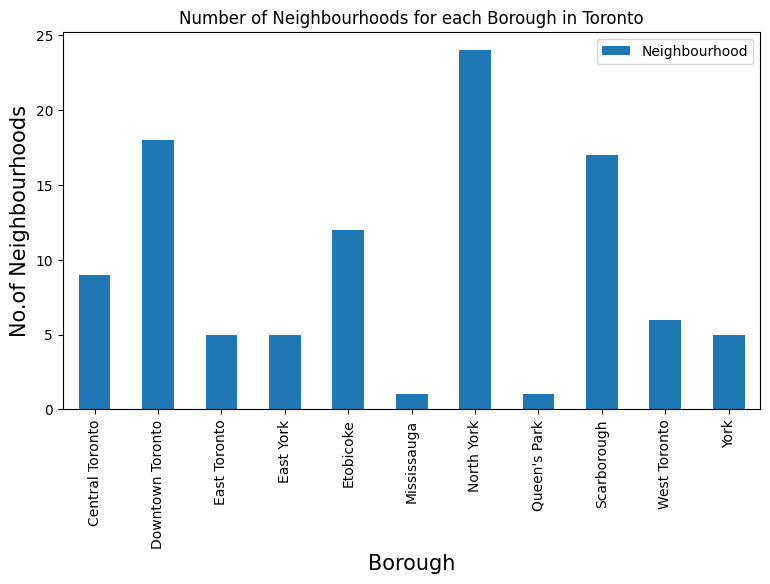

In [7]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighbourhoods for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighbourhoods', fontsize=15)
#giving a bar plot
Coordinates_df.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

North York is the Borough with the most neighbourhoods

In [8]:
CLIENT_ID = 'MU15BZSE43D0CRWUDRT5YH2SONKSCO25FQIR1KPQBILKDHUW' 
CLIENT_SECRET = 'QL5RHBFTEHFLZ0FUVDGW05QGRZHR1GRG5CMB0JQ1QHF5MSZT'
VERSION = '20191225' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MU15BZSE43D0CRWUDRT5YH2SONKSCO25FQIR1KPQBILKDHUW
CLIENT_SECRET:QL5RHBFTEHFLZ0FUVDGW05QGRZHR1GRG5CMB0JQ1QHF5MSZT


In [9]:
radius=1000
LIMIT=100
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
toronto_venues = getNearbyVenues(names=Coordinates_df['Neighbourhood'],
                                   latitudes=Coordinates_df['Latitude'],
                                   longitudes=Coordinates_df['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Queen's Park
Islington Avenue
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Glencairn
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood]], Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks]]
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
T

In [10]:
toronto_venues.groupby('Neighbourhood').count()
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot.head()
toronto_onehot.shape
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()
kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)
toronto_merged = Coordinates_df
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
toronto_merged.head()
toronto_merged=toronto_merged.dropna()
toronto_merged['Cluster_Labels'] = toronto_merged.Cluster_Labels.astype(int)
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.08
1                 Café  0.07
2                Hotel  0.05
3  Japanese Restaurant  0.04
4              Theater  0.04


----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.13
1         Shopping Mall  0.07
2  Caribbean Restaurant  0.04
3        Sandwich Place  0.04
4           Coffee Shop  0.04


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                  venue  freq
0    Chinese Restaurant  0.21
1           Pizza Place  0.07
2                  Park  0.07
3                   Gym  0.03
4  Fast Food Restaurant  0.03


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
           venue  freq
0    Pizza Place  0.24
1  Grocery Store  0.18
2     Beer Store  0.06
3       Pharmacy  0.06
4           Park  0.06


----Alderwood, Long Branch----
            venue  freq
0  Discount Store  0.12
1      

            venue  freq
0  Clothing Store  0.11
1     Coffee Shop  0.11
2  Sandwich Place  0.05
3          Bakery  0.05
4       Juice Bar  0.05


----First Canadian Place, Underground city----
                 venue  freq
0          Coffee Shop  0.10
1                 Café  0.06
2                Hotel  0.05
3  Japanese Restaurant  0.03
4       Cosmetics Shop  0.03


----Flemingdon Park, Don Mills South----
                 venue  freq
0           Restaurant  0.14
1                  Gym  0.07
2  Sporting Goods Shop  0.05
3          Supermarket  0.05
4          Coffee Shop  0.05


----Forest Hill North, Forest Hill West----
         venue  freq
0         Park  0.09
1         Café  0.06
2         Bank  0.06
3  Coffee Shop  0.06
4        Trail  0.04


----Glencairn----
                  venue  freq
0         Grocery Store  0.10
1  Fast Food Restaurant  0.10
2           Coffee Shop  0.07
3           Gas Station  0.07
4           Pizza Place  0.07


----Guildwood]], Morningside, West Hill---

            venue  freq
0     Coffee Shop  0.06
1             Pub  0.06
2     Pizza Place  0.05
3  Breakfast Spot  0.04
4           Beach  0.04


----The Beaches West, India Bazaar----
                  venue  freq
0     Indian Restaurant  0.09
1           Coffee Shop  0.05
2                 Beach  0.04
3  Fast Food Restaurant  0.04
4         Grocery Store  0.04


----The Danforth West, Riverdale----
                venue  freq
0    Greek Restaurant  0.11
1         Coffee Shop  0.07
2                Café  0.06
3                 Pub  0.05
4  Italian Restaurant  0.03


----The Kingsway, Montgomery Road, Old Mill North----
               venue  freq
0        Coffee Shop  0.09
1               Park  0.04
2  French Restaurant  0.04
3       Burger Joint  0.04
4               Bank  0.04


----Thorncliffe Park----
               venue  freq
0        Coffee Shop  0.09
1  Indian Restaurant  0.07
2        Pizza Place  0.06
3      Grocery Store  0.06
4     Sandwich Place  0.04


----Victoria Villag